In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
dataset = pd.read_csv("UberDataset.csv")



In [3]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Data Preprocessing

In [8]:
dataset['PURPOSE'].fillna("NOT",inplace = True)

C:\Users\anike\AppData\Local\Temp\ipykernel_30500\637165229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT",inplace = True)


In [10]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [16]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [18]:
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [20]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [22]:
dataset['day-night'] = pd.cut(x=dataset['time'],bins = [0,10,15,19,24] , labels = ['Morning' , 'Afternoon', 'Evening' , 'Night'])

In [24]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [26]:
dataset.dropna(inplace = True)

In [28]:
dataset.shape

(413, 10)

# Data Visualization

<Axes: xlabel='count', ylabel='PURPOSE'>

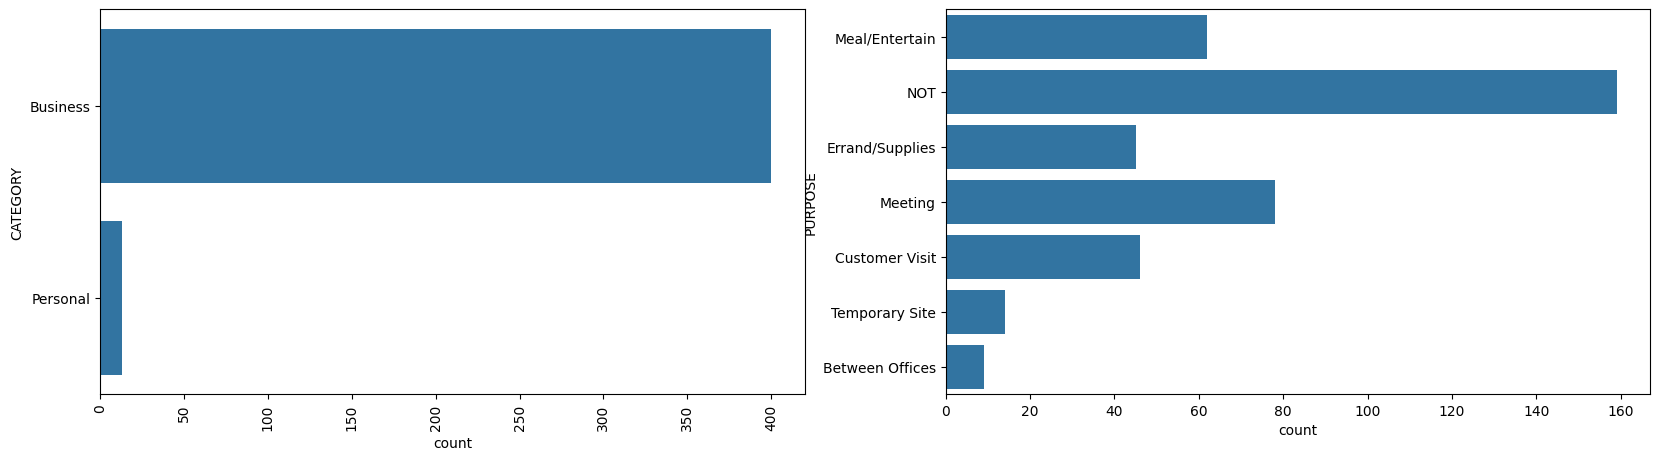

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

sns.countplot(dataset ['CATEGORY'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])

<Axes: xlabel='count', ylabel='day-night'>

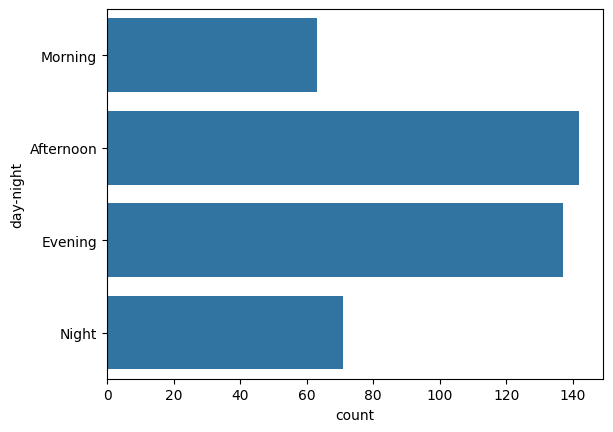

In [33]:
sns.countplot(dataset['day-night'])

In [35]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month

month_label = {1.0 : 'Jan' , 2.0 : 'Feb' , 3.0 : 'March' , 4.0 : 'April' ,
               5.0 : 'May', 6.0 : 'Jun' , 7.0 : 'Jul' , 8.0 : 'Aug' ,
               9.0 : 'Sep' , 10.0 : 'Oct' , 11.0 : 'Nov' , 12.0 : 'Dec' }

# Replacing the values
dataset["MONTH"] = dataset.MONTH.map(month_label)

#caalculate the count of months
mon = dataset.MONTH.value_counts(sort=False)

In [37]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


<Axes: xlabel='count', ylabel='MONTH'>

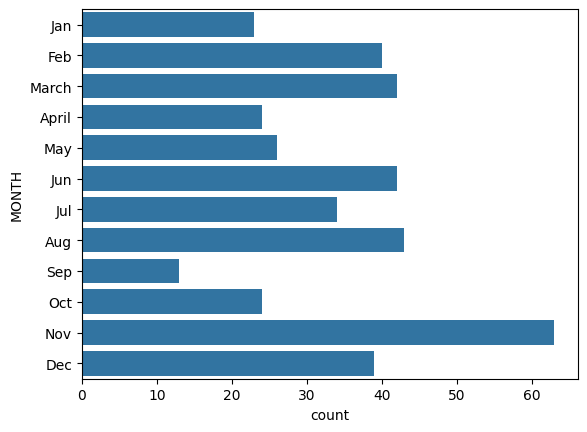

In [39]:
sns.countplot(dataset['MONTH'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

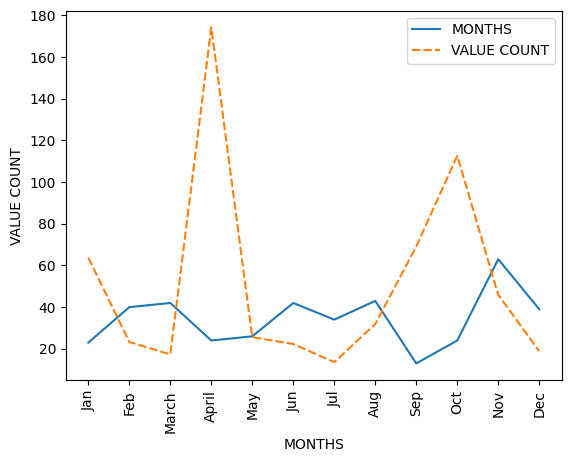

In [41]:
df = pd.DataFrame({
    "MONTHS": mon.values, #total count of each month
    "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max() # Max miles of each month
})

p = sns.lineplot(data=df) # create line plot
p.set(xlabel="MONTHS" , ylabel="VALUE COUNT")
plt.xticks(rotation = 90)

Uber ride counts by month (least to most):


MONTH
Sep      13
Jan      23
April    24
Oct      24
May      26
Jul      34
Dec      39
Feb      40
March    42
Jun      42
Aug      43
Nov      63
Name: count, dtype: int64


Months with the least number of Uber rides:
['Sep']


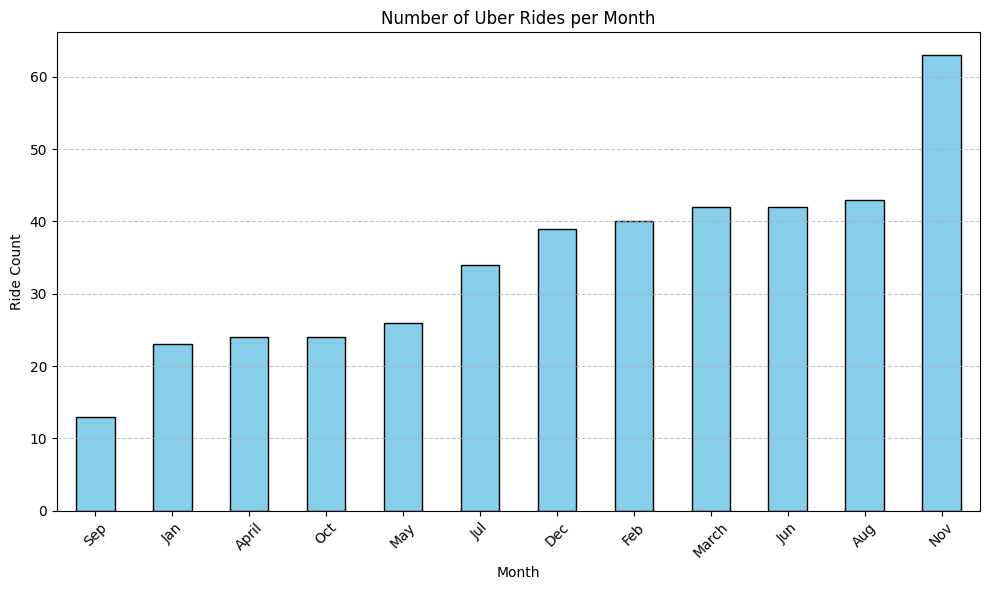

In [43]:
month_counts = dataset['MONTH'].value_counts()

# Sort in ascending order to find least frequent
month_counts_sorted = month_counts.sort_values()

# Display sorted month counts
print("Uber ride counts by month (least to most):")
display(month_counts_sorted)

# Find the minimum count value
min_count = month_counts_sorted.min()

# Get all months with the minimum count
least_months = month_counts_sorted[month_counts_sorted == min_count].index.tolist()

print("\nMonths with the least number of Uber rides:")
print(least_months)

# Optional: Bar plot
plt.figure(figsize=(10, 6))
month_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Uber Rides per Month')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [52]:
dataset['DAY'] = dataset.START_DATE.dt.weekday

day_label = {
    0 : 'MON' , 1 : 'TUES' , 2 : 'WED', 3 : 'THUR', 4 : 'FRI', 5 : 'SAT', 6 : 'SUN' 
}
dataset['DAY'] = dataset['DAY'].map(day_label)

In [54]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,FRI
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,SAT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,SAT
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,TUES
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,WED


Text(0, 0.5, 'COUNT')

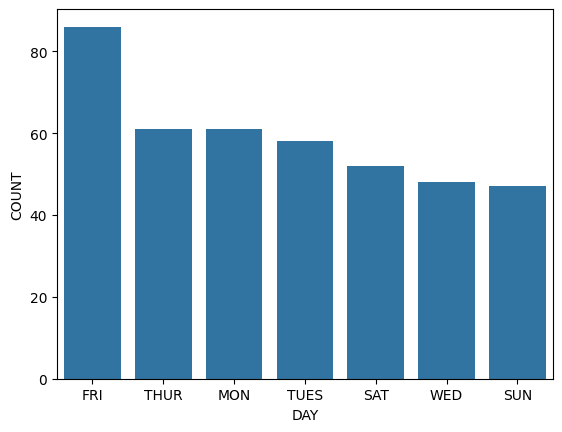

In [56]:
day_label = dataset.DAY.value_counts()

sns.barplot(x = day_label.index , y = day_label)

plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

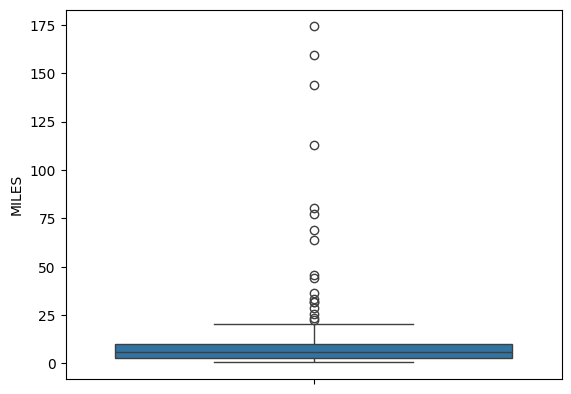

In [60]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

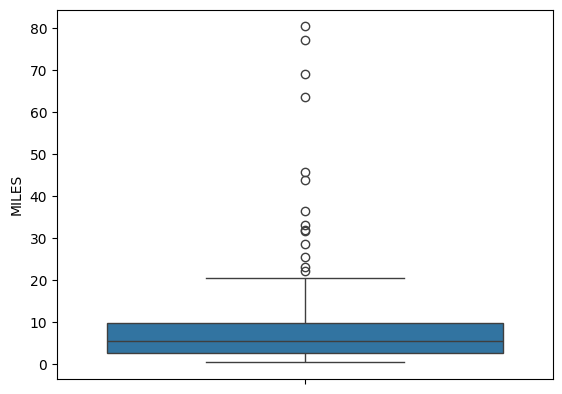

In [66]:
sns.boxplot(dataset[dataset['MILES'] <100]['MILES'])

C:\Users\anike\AppData\Local\Temp\ipykernel_30500\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

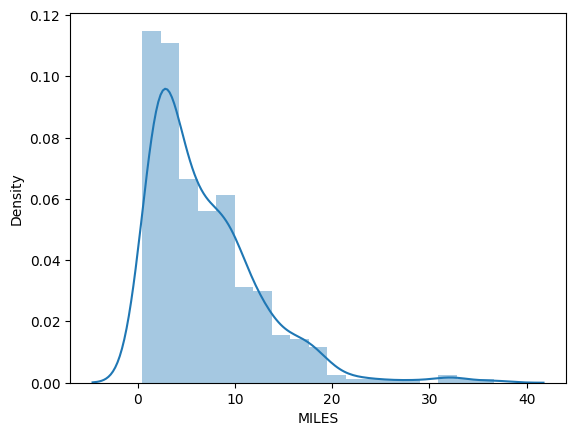

In [68]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

**0 TO 20 MILES**